In [1]:
%matplotlib notebook
# %matplotlib inline
import mne
import matplotlib.pyplot as plt

fname = "oddball-epo.fif"

epochs = mne.read_epochs(fname)

Reading C:\Users\LAPTOP\jupydir\gpu\eeg study\mne 예제\oddball-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


In [3]:
epochs

Number of events,212
Events,standard/stim: 106target/stim: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [4]:
epochs.get_data().shape

(212, 64, 71)

In [5]:
target = epochs["target"].average()
target

<Evoked | 'target/stim' (average, N=106), -0.2 – 0.5 sec, baseline -0.2 – 0 sec, 63 ch, ~103 kB>

In [7]:
print(target.info)

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 63
 projs: []
 sfreq: 100.0 Hz
>


'plot',
 'plot_field',
 'plot_image',
 'plot_joint',
 'plot_projs_topomap',
 'plot_sensors',
 'plot_topo',
 'plot_topomap',
 'plot_white',

<IPython.core.display.Javascript object>


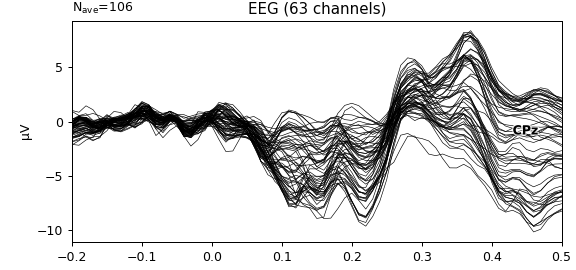

In [13]:
target.plot(); # average ERP

<IPython.core.display.Javascript object>


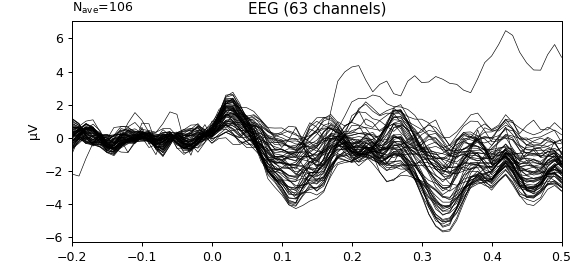

In [15]:
standard = epochs["standard"].average()
standard.plot();

<IPython.core.display.Javascript object>


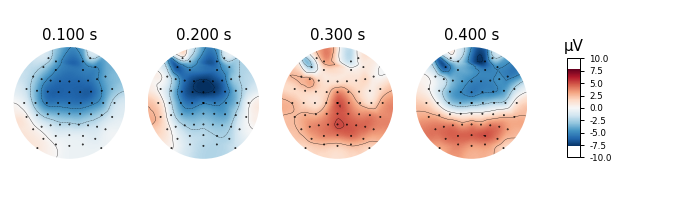

In [18]:
target.plot_topomap(times = [0.1, 0.2, 0.3, 0.4]); #0.5

<IPython.core.display.Javascript object>


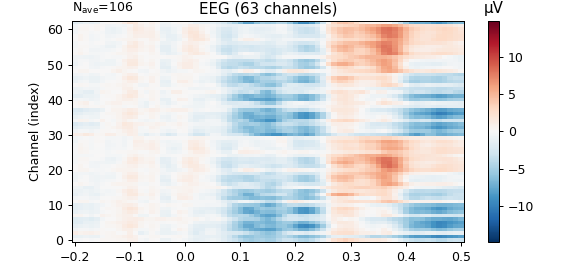

In [25]:
target.plot_image();

<IPython.core.display.Javascript object>


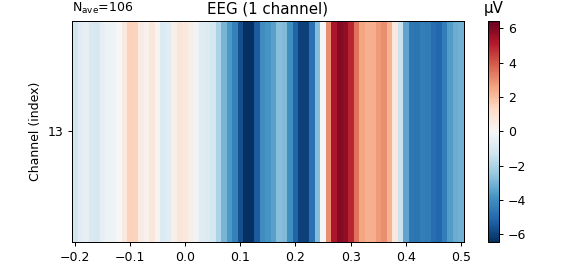

In [33]:
target.plot_image(picks=[13]);

No projector specified for this dataset. Please consider the method self.add_proj.


<IPython.core.display.Javascript object>


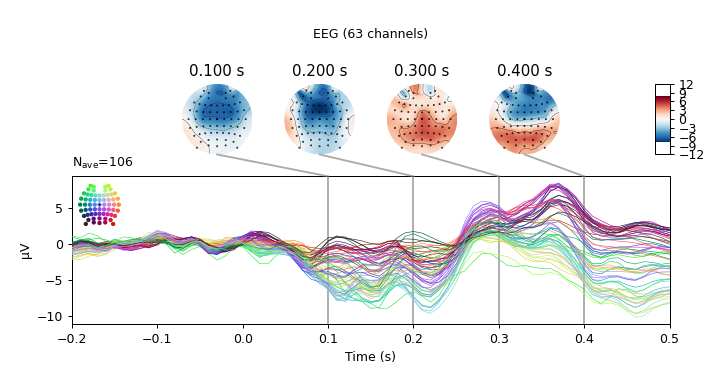

In [26]:
target.plot_joint(times = [0.1, 0.2, 0.3, 0.4]);

No projector specified for this dataset. Please consider the method self.add_proj.


<IPython.core.display.Javascript object>


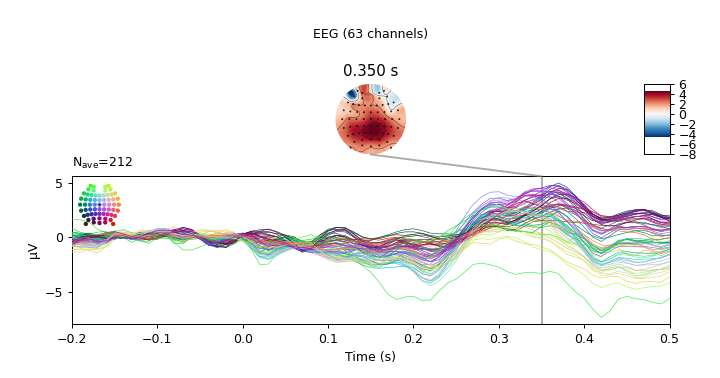

In [28]:
diff = mne.combine_evoked((target, -standard), weights='equal')
# diff = mne.combine_evoked((target, standard), weights=[1, -1])
diff.plot_joint(times=.35);

<IPython.core.display.Javascript object>


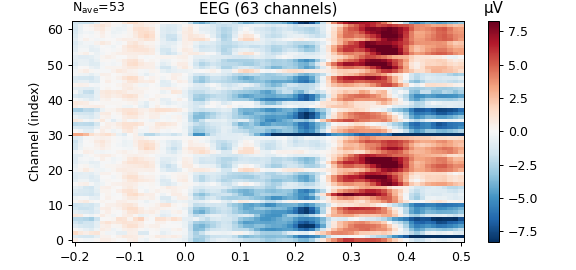

In [32]:
diff.plot_image();

<IPython.core.display.Javascript object>


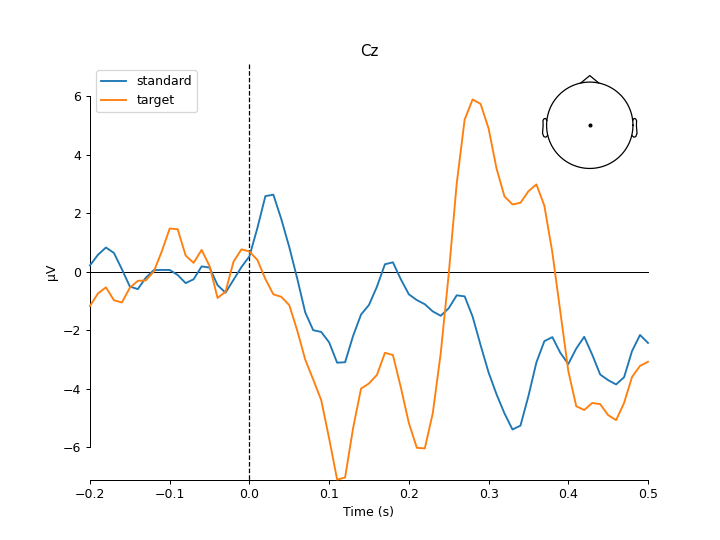

In [40]:
mne.viz.plot_compare_evokeds({"standard": standard,"target": target}, picks=[13]);

<IPython.core.display.Javascript object>


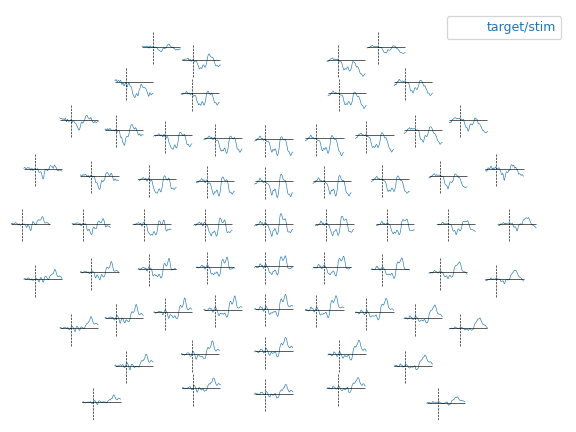

In [53]:
target.plot_topo();

---

    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


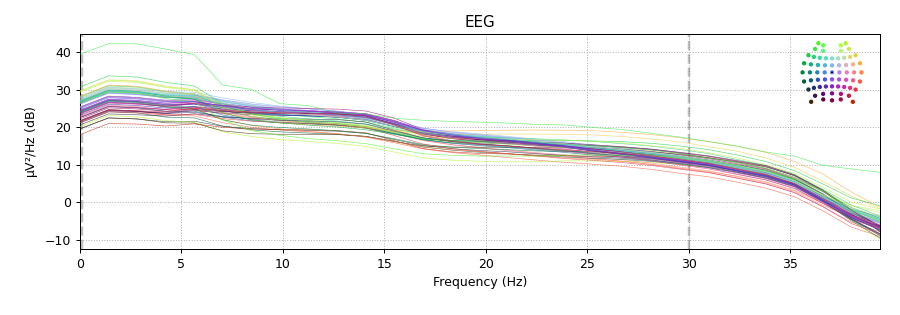

In [72]:

epochs.plot_psd(fmin=0, fmax=40);

In [63]:
import numpy as np
np.arange(3, 30)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [78]:
import numpy as np
from mne.time_frequency import tfr_morlet

freqs = np.arange(5, 20)
n_cycles = 2
tfr_target = tfr_morlet(target, freqs, n_cycles, return_itc=False)
tfr_standard = tfr_morlet(standard, freqs, n_cycles, return_itc=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.0s finished


In [79]:
tfr_target.data.shape

(63, 15, 71)

No baseline correction applied


<IPython.core.display.Javascript object>


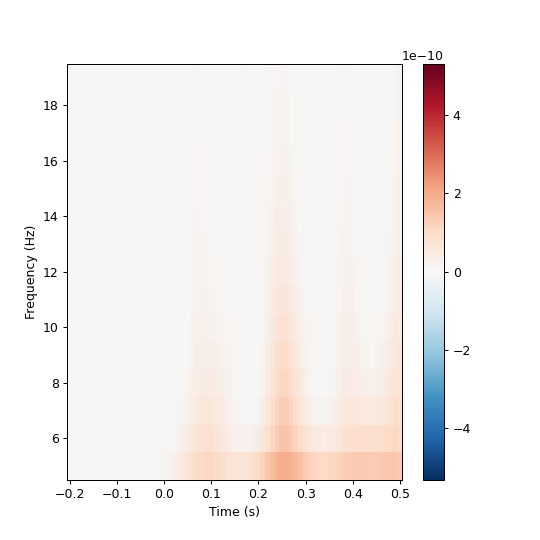

<IPython.core.display.Javascript object>


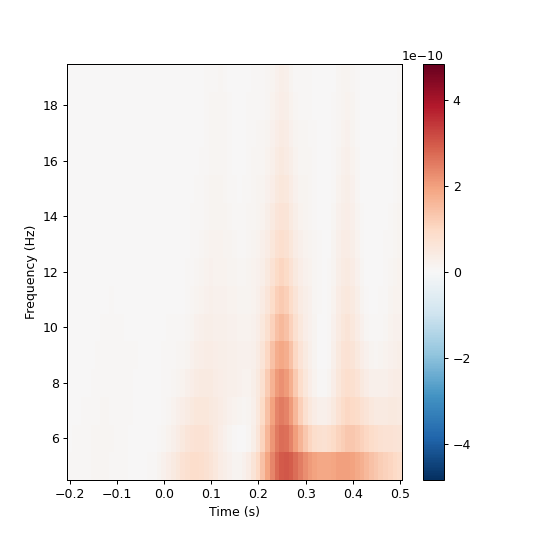

In [85]:
tfr_target.plot(picks=[13]);

No baseline correction applied


<IPython.core.display.Javascript object>


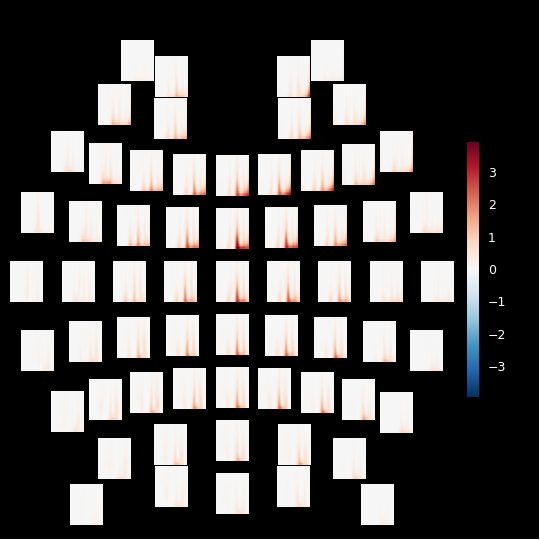

In [86]:
tfr_target.plot_topo();

No baseline correction applied


<IPython.core.display.Javascript object>


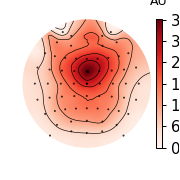

In [88]:
tfr_target.plot_topomap();

Applying baseline correction (mode: mean)
No baseline correction applied
No baseline correction applied


<IPython.core.display.Javascript object>


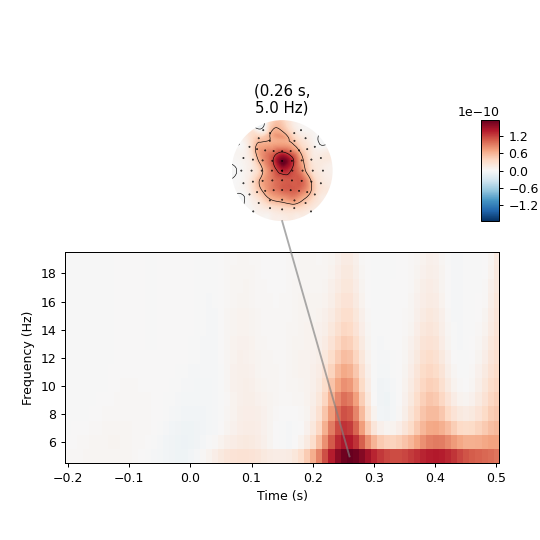

In [90]:
tfr_contrast = mne.combine_evoked((tfr_standard, tfr_target), (-.5, .5))
tfr_contrast.apply_baseline((None, 0))
tfr_contrast.plot_joint();

No baseline correction applied


<IPython.core.display.Javascript object>


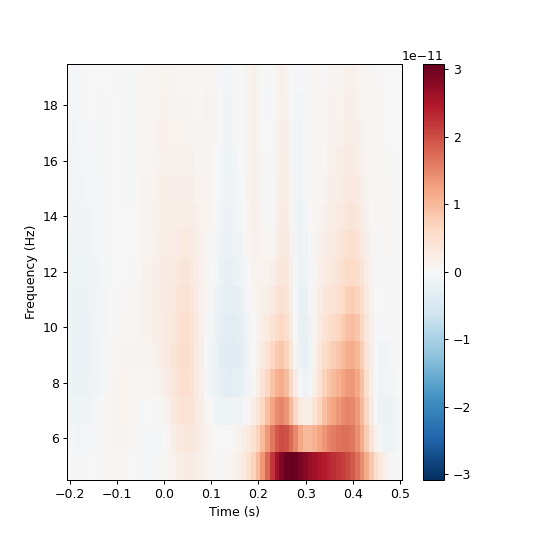

In [93]:
tfr_contrast.plot(picks=[27]);

In [94]:
tfr_target.data

array([[[4.49536242e-13, 6.10874940e-13, 7.93298509e-13, ...,
         6.07665506e-11, 5.86412240e-11, 5.53389162e-11],
        [3.22403754e-13, 4.72825928e-13, 6.56760803e-13, ...,
         4.13808411e-11, 4.20559873e-11, 4.09978991e-11],
        [2.21506689e-13, 3.40114866e-13, 4.96774691e-13, ...,
         2.83583108e-11, 3.12247019e-11, 3.19323785e-11],
        ...,
        [3.06179291e-14, 1.23897510e-14, 5.85611251e-15, ...,
         1.00180557e-12, 3.27347054e-12, 7.95454488e-12],
        [3.22133911e-14, 1.21607789e-14, 1.13662911e-15, ...,
         6.18611720e-13, 2.49318348e-12, 7.37975769e-12],
        [3.43462991e-14, 1.39353231e-14, 9.30343889e-17, ...,
         3.88459857e-13, 1.89152276e-12, 6.92583538e-12]],

       [[3.57509388e-12, 4.13214684e-12, 4.72070726e-12, ...,
         2.67703375e-10, 2.83652934e-10, 2.87415664e-10],
        [3.45392406e-12, 4.05429871e-12, 4.72400754e-12, ...,
         2.03705547e-10, 2.25735523e-10, 2.33825171e-10],
        [3.09476552e-12, 